### 1.B DATA VISUALIZATION

Importing required libraries/packages

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from wordcloud import WordCloud
from collections import Counter
warnings.filterwarnings("ignore")

Load the processed dataset

In [62]:
df_train = pd.read_csv('../data_prep/processed_essays.csv')

In [63]:
def string_to_list(string):
    return string.split()

In [64]:
def nan_to_blank(val):
    if pd.isna(val) or val is None:
        return ''
    else:
        return val

In [65]:
df_train['lemmatized_text'] = df_train['lemmatized_text'].apply(string_to_list)
df_train['cleaned_tokenize_text'] = df_train['cleaned_tokenize_text'].apply(string_to_list)
df_train['corrected_text'] = df_train['corrected_text'].apply(string_to_list)
df_train['mistakes'] = df_train['mistakes'].apply(nan_to_blank)
df_train['mistakes'] = df_train['mistakes'].apply(string_to_list)

As a first thing, let's see which words are prominent in the essays and try to understand the importance of words using wordcloud and plotting the top-30 words on the basis of their respective frequency.

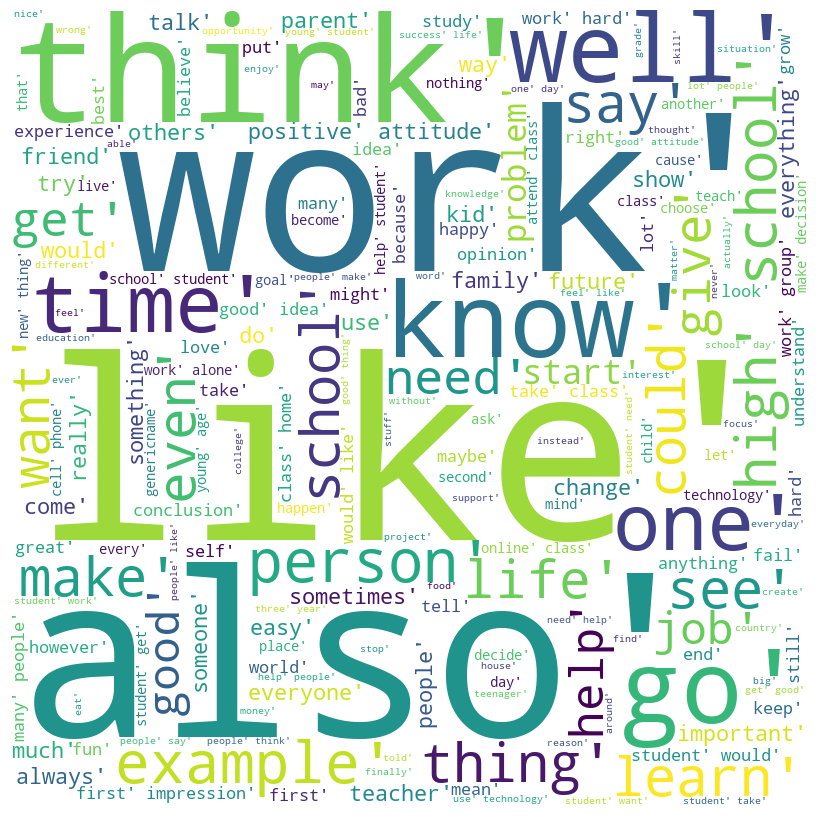

In [66]:
# Convert the list of tokenized words to a string for each row in the column
text = df_train['lemmatized_text'].apply(lambda x: ''.join(x))

# Join the strings
words = ' '.join(text.tolist())

# Create a wordcloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(words)


# Plot the wordcloud
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

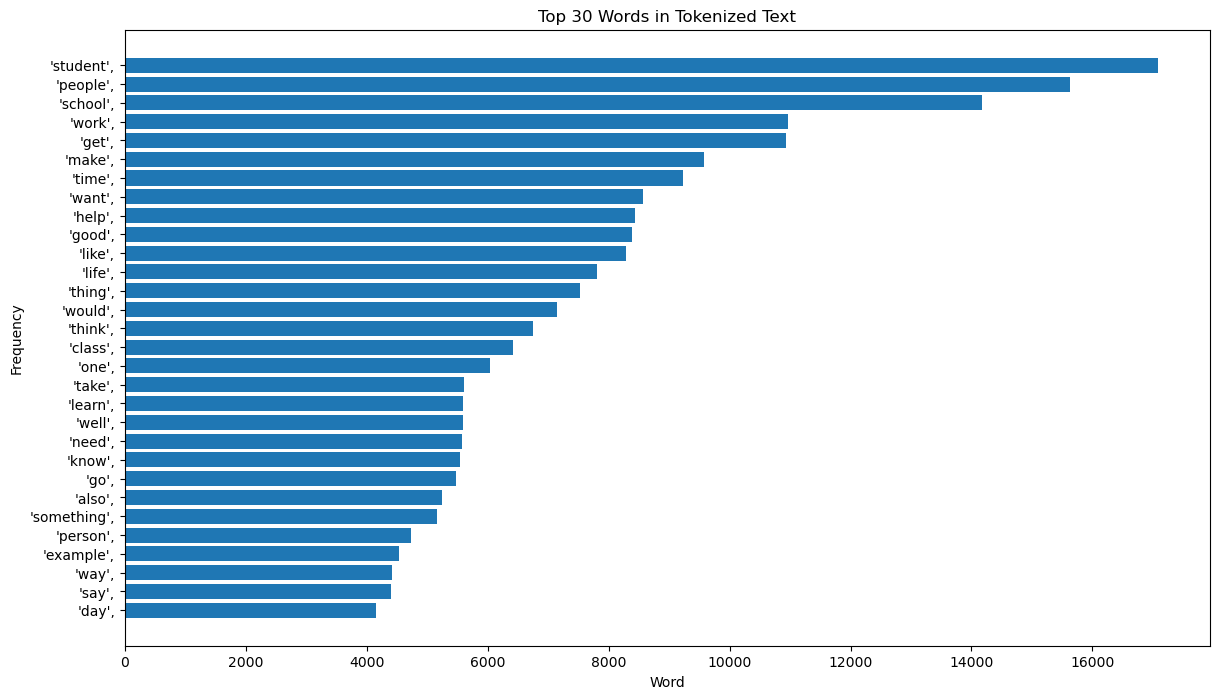

In [67]:
# Flatten the list of tokenized words
words = [word for sentence in df_train['lemmatized_text'] for word in sentence]

# Count the frequency of each word
word_freq = Counter(words)

# Print the 30 most common words and their frequencies
word_list = word_freq.most_common(30)

# Sort the word list in descending order of frequency
word_list = sorted(word_list, key=lambda x: x[1], reverse=False)

# Set the figure size
plt.figure(figsize=(14, 8))

# Create a bar chart of the word frequencies
plt.barh([word[0] for word in word_list], [word[1] for word in word_list])

# Set the chart title and axis labels
plt.title('Top 30 Words in Tokenized Text')
plt.xlabel('Word')
plt.ylabel('Frequency')

# Show the chart
plt.show()

We see from above visualizations that student, people, and school are the three top most used words in the essay. This further gives some insight that essays could be more likely to be related to education, learning, or group of individuals in education.

Let's try to understand more in terms of how long the essays are written by students,  number of sentences used by students in essays, what is the lenght of those sentences or how many words does these essay contain.

Average essay length written by a student: 2335
Minimum essay length written by a student: 82
Maximum essay length written by a student: 6044


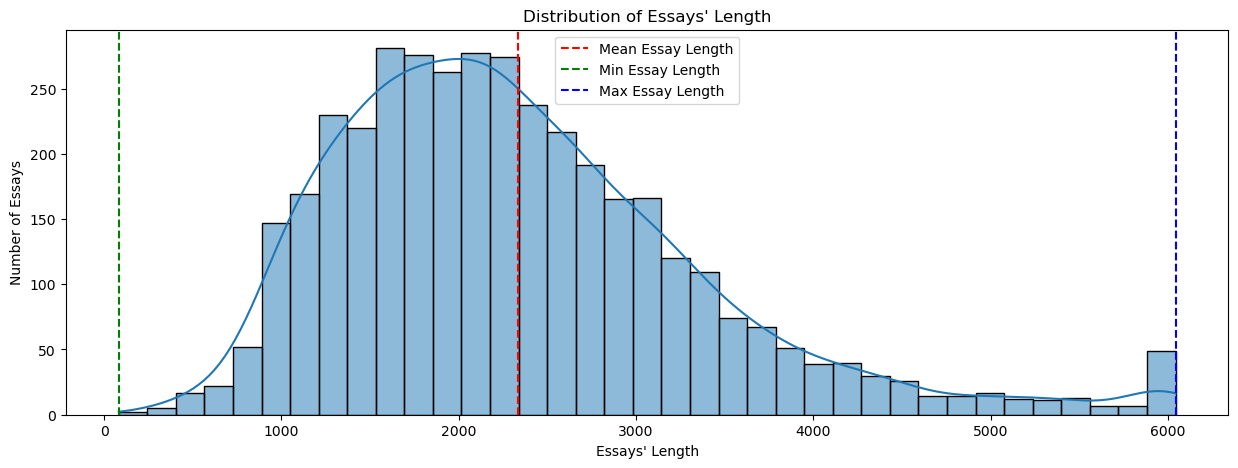

In [68]:
# Compute the length of each essay
essay_lengths = df_train['full_text'].apply(len)

# Compute the statistics
mean_length = essay_lengths.mean()
print('Average essay length written by a student:', round(mean_length))

min_length = essay_lengths.min()
print('Minimum essay length written by a student:', round(min_length))

max_length = essay_lengths.max()
print('Maximum essay length written by a student:', round(max_length))

# Set the figure size and style
plt.figure(figsize=(15, 5))


# Plot the distribution of essay lengths
sns.histplot(data=essay_lengths, kde=True)

# Add a vertical line for the mean essay length
plt.axvline(x=mean_length, color='red', linestyle='--', label='Mean Essay Length')

# Add a vertical line for the minimum essay length
plt.axvline(x=min_length, color='green', linestyle='--', label='Min Essay Length')

# Add a vertical line for the minimum essay length
plt.axvline(x=max_length, color='blue', linestyle='--', label='Max Essay Length')

# Set the title and labels
plt.title("Distribution of Essays' Length")
plt.xlabel("Essays' Length")
plt.ylabel("Number of Essays")

# Add a legend
plt.legend()

# Show the plot
plt.show()

It can be seen from the above that some students have written very lengthy essays which skews the overall distribution towards right. 

Average Number of Sentences in an Essay: 18
Minimum Number of Sentences in an Essay: 1
Maximum Number of Sentences in an Essay: 99


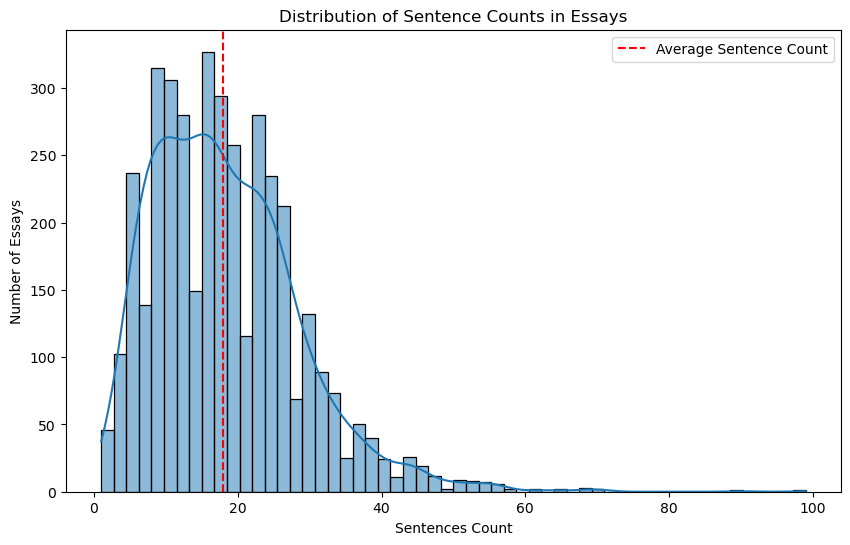

In [69]:
avg_sent = round(df_train['sent_count'].mean())
print('Average Number of Sentences in an Essay: {}'.format(avg_sent))

min_sent = round(df_train['sent_count'].min())
print('Minimum Number of Sentences in an Essay: {}'.format(min_sent))

max_sent = round(df_train['sent_count'].max())
print('Maximum Number of Sentences in an Essay: {}'.format(max_sent))

# Set the figure size and style
plt.figure(figsize=(10, 6))

# Plot the distribution of sentence counts
title = 'Distribution of Sentence Counts in Essays'
sns.histplot(df_train['sent_count'], kde=True)
plt.axvline(x=avg_sent, color='red', linestyle='--', label='Average Sentence Count')
plt.legend()
plt.title(title)
plt.xlabel('Sentences Count')
plt.ylabel('Number of Essays')

# Show the plot
plt.show()

Above makes sense as students are expected to write distinct number of sentences in essay. The number of sentences might also impacted with the topic of essays assigned to students.

Average Sentence Length: 30
Min Sentence Length: 6
Max Sentence Length: 578


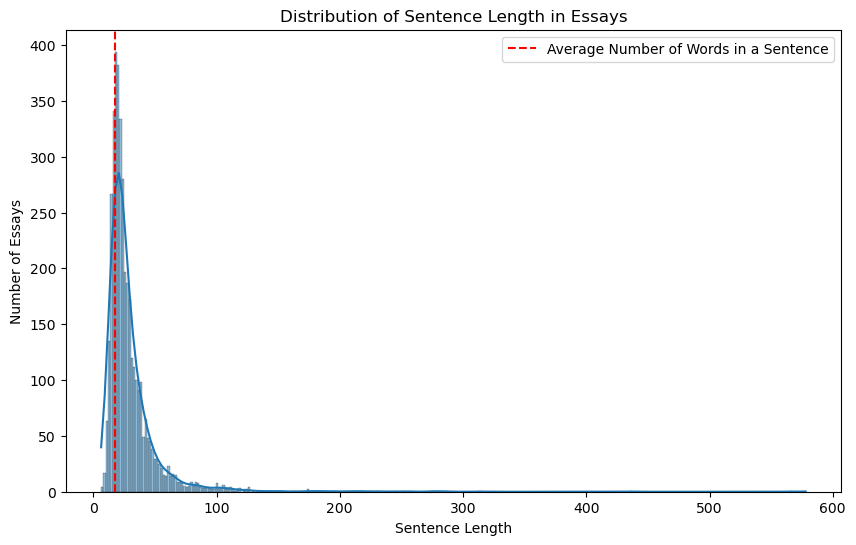

In [70]:
avg_sent_len = round(np.mean(df_train['sent_len']))
print('Average Sentence Length: {}'.format(avg_sent_len))

min_sent_len = round(np.min(df_train['sent_len']))
print('Min Sentence Length: {}'.format(min_sent_len))

max_sent_len = round(np.max(df_train['sent_len']))
print('Max Sentence Length: {}'.format(max_sent_len))

# Set the figure size and style
plt.figure(figsize=(10, 6))

# Plot the distribution of sentence length
title = 'Distribution of Sentence Length in Essays'
sns.histplot(df_train['sent_len'], kde=True)
plt.axvline(x=avg_sent, color='red', linestyle='--', label='Average Number of Words in a Sentence')
plt.legend()
plt.title(title)
plt.xlabel('Sentence Length')
plt.ylabel('Number of Essays')

# Show the plot
plt.show()

Distribution of sentences count is highly rightly skewed in nature, which signifies that how some students exceptionally wrote sentences with more words. 

Mean word count in essay: 430
Min word count in essay: 14
Max word count in essay: 1260


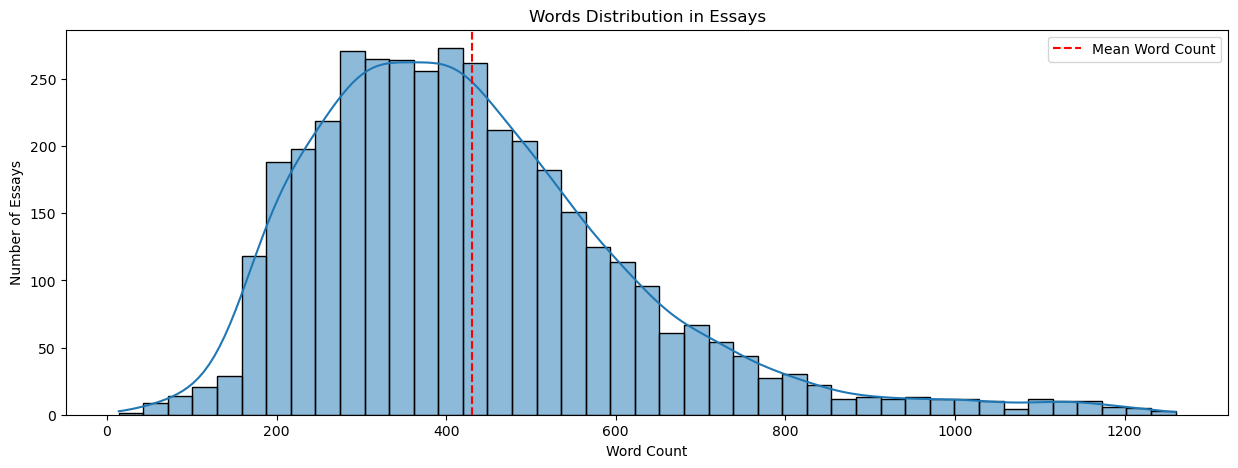

In [71]:
# Set the figure size and style
fig = plt.figure(figsize=(15, 5))

# Plot the distribution of word count
sns.histplot(data=df_train, x="word_count", kde=True)

# Plot the mean of word count
mean_word_count = df_train['word_count'].mean()
print('Mean word count in essay:', round(mean_word_count))

min_word_count = df_train['word_count'].min()
print('Min word count in essay:', round(min_word_count))

max_word_count = df_train['word_count'].max()
print('Max word count in essay:', round(max_word_count))

plt.axvline(x=mean_word_count, color='red', linestyle='--', label='Mean Word Count')
plt.legend()

# Set the title and labels
plt.title("Words Distribution in Essays")
plt.xlabel("Word Count")
plt.ylabel("Number of Essays")

# Show the plot
plt.show()


This visualization is in alignment with the essay length signifying how some students used more words to write essays and made the normal distribution rightly skewed.

### 1.C INSIGHTS DISCOVERY

Let's try to understand how the score of essays are assigned.

In [72]:
low_df = df_train[df_train['score_category'] == 'low'].reset_index()
med_df = df_train[df_train['score_category'] == 'medium'].reset_index()
high_df = df_train[df_train['score_category'] == 'high'].reset_index()

print('Low Scored Essays Shape: ', low_df.shape)
print('Medium Scored Essays Shape: ', med_df.shape)
print('High Scored Essays Shape: ', high_df.shape)

KeyError: 'score_category'

Basis on the criteria, if all scoring matrix are less than equal to 2.5 then essay is low-scored; if all scoring matrix are greater than equal to 4.0 then essay is high-scored; else medium-scored.

Reading a few samples of low-scored and high-scored essays to understand how grader would think to asses the quality of essays.

In [73]:
low_df['full_text'][0]

NameError: name 'low_df' is not defined

In [ ]:
high_df['full_text'][0]

As a grader, I would think the first thing to look out is the number of spelling mistakes done by the students in essay.

Let's look at the proportion of mistakes in low-scored and high-scored essays.

In [74]:
print('Minimum number of mistakes done in a low-scored essay: ', low_df['num_mistakes'].min())
print('Maximum number of mistakes done in a low-scored essay: ', low_df['num_mistakes'].max())
print('Minimum number of mistakes done in a high-scored essay: ', high_df['num_mistakes'].min())
print('Maximum number of mistakes done in a high-scored essay: ', high_df['num_mistakes'].max())

fig, ax = plt.subplots(figsize=(9, 6))

# Plot the histograms of num_mistakes for low_df and high_df
sns.histplot(data=low_df, x='num_mistakes', color='red', alpha=0.5, stat='percent', label='Low Scored Essays', kde=True)
sns.histplot(data=high_df, x='num_mistakes', color='green', alpha=0.5, stat='percent', label='High Scored Essays', kde=True)

# Set the chart title and axis labels
plt.title('Percentage of Mistakes in Low and High Scored Essays')
plt.xlabel('Number of Mistakes')
plt.ylabel('Frequency')

# Add a legend to the chart
plt.legend()

# Show the chart
plt.show()

NameError: name 'low_df' is not defined

Above plot signifies how essays with most spelling mistakes were scored poorly, which makes to give more score to essays with rightly spelled words.

NameError: name 'low_df' is not defined

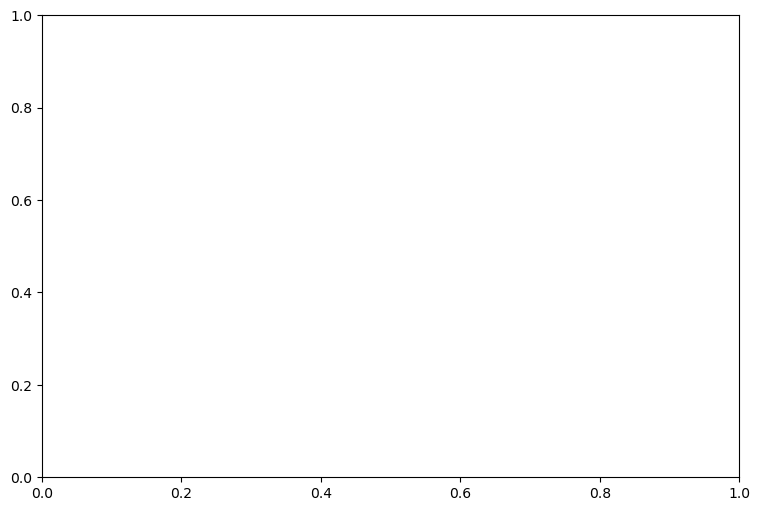

In [75]:
low_palette = {'low': 'red'}
high_palette = {'high': 'green'}

# Scatter plot for sent_len vs word_count by Score_Category
fig, ax = plt.subplots(figsize=(9, 6))
sns.scatterplot(x='sent_count', y='sent_len', hue='score_category', palette=low_palette, data=low_df, ax=ax)

# Scatter plot for sent_len vs word_count by Score_Category for high scored essays
sns.scatterplot(x='sent_count', y='sent_len', hue='score_category', palette=high_palette, data=high_df, ax=ax)

# Set x and y limits for the plot
plt.xlim(0, 80)
plt.ylim(0, 450)

# Calculate and plot the average word_count for low and high scored essays
low_sent_count_mean = round(low_df['sent_count'].mean())
high_sent_count_mean = round(high_df['sent_count'].mean())
print('Average number of sentences used by students in low-scored essays', low_sent_count_mean)
print('Average number of sentences used by students in high-scored essays',high_sent_count_mean)

# Calculate and plot the average sent_len for low and high scored essays
low_sent_len_mean = round(low_df['sent_len'].mean())
high_sent_len_mean = round(high_df['sent_len'].mean())
print('Average sentence length written by students in low-scored essays', low_sent_len_mean)
print('Average sentence length written by students in high-scored essays',high_sent_len_mean)

# Add plot titles and labels
plt.title('Sent_count vs Sent_len by Score_Category')
plt.xlabel('Sent_count')
plt.ylabel('Sent_len')

# Show the plot
plt.show()

This insight is interesting and signifies how students with high scored essays used more short sentences, where as students who got low score wrote lengthy sentences but number of sentences were very less.

We saw in the data visualization module how some students exceptionally wrote lengthy sentences, however writing long sentences do not gurantee a high score.



In [ ]:
low_palette = {'low': 'red'}
high_palette = {'high': 'green'}

# Scatter plot for sent_len vs word_count by Score_Category
fig, ax = plt.subplots(figsize=(9, 6))
sns.scatterplot(x='word_count', y='sent_len', hue='score_category', palette=low_palette, data=low_df, ax=ax)

# Scatter plot for sent_len vs word_count by Score_Category for high scored essays
sns.scatterplot(x='word_count', y='sent_len', hue='score_category', palette=high_palette, data=high_df, ax=ax)

# Set x and y limits for the plot
plt.xlim(0, 1000)
plt.ylim(0, 100)

# Calculate and plot the average word_count for low and high scored essays
low_word_count_mean = round(low_df['word_count'].mean())
high_word_count_mean = round(high_df['word_count'].mean())

# Calculate and plot the average sent_len for low and high scored essays
low_sent_len_mean = round(low_df['sent_len'].mean())
high_sent_len_mean = round(high_df['sent_len'].mean())

# Add plot titles and labels
plt.title('Sent_len vs Word_count by Score_Category')
plt.xlabel('Word_count')
plt.ylabel('Sent_len')

# Show the plot
plt.show()

#Try histogram

This visualization makes sense as students with low scored essays used more words to make their sentences lengthy.

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(x='noun_count', data=low_df, bins=20, stat= 'percent', color='red', alpha=0.5, label='Low Scored Essays', ax=axs[0, 0])
sns.histplot(x='noun_count', data=high_df, bins=20, stat= 'percent', color='green', alpha=0.5, label='High Scored Essays', ax=axs[0, 0])

sns.histplot(x='verb_count', data=low_df, bins=20, stat= 'percent', color='red', alpha=0.5, label='Low Scored Essays', ax=axs[0, 1])
sns.histplot(x='verb_count', data=high_df, bins=20, stat= 'percent', color='green', alpha=0.5, label='High Scored Essays', ax=axs[0, 1])

sns.histplot(x='adverb_count', data=low_df, bins=20, stat= 'percent', color='red', alpha=0.5, label='Low Scored Essays', ax=axs[1, 0])
sns.histplot(x='adverb_count', data=high_df, bins=20, stat= 'percent', color='green', alpha=0.5, label='High Scored Essays', ax=axs[1, 0])

sns.histplot(x='adjective_count', data=low_df, bins=20, stat= 'percent', color='red', alpha=0.5, label='Low Scored Essays', ax=axs[1, 1])
sns.histplot(x='adjective_count', data=high_df, bins=20, stat= 'percent', color='green', alpha=0.5, label='High Scored Essays', ax=axs[1, 1])

plt.suptitle('Proportion of POS Tags in Low and High Scored Essays')
plt.tight_layout()

plt.show()

Another good insight is that how students used more nouns, adverbs, adjectives and verbs in their essays to get a high score.

In [ ]:
# create a dataframe with aggregated counts for each POS tag and score level
pos_counts = pd.concat([low_df.mean(), high_df.mean()], axis=1)
pos_counts.columns = ['low', 'high']
pos_counts = pos_counts[['low', 'high']].T[['noun_count', 'verb_count', 'adverb_count', 'adjective_count']]

# plot the stacked bar chart
pos_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Score Level')
plt.ylabel('Count')
plt.title('Average usage of POS Tags in Low and High Scored Essays')
plt.legend(['Noun', 'Verb', 'Adverb', 'Adjective'])
plt.show()

In [ ]:
# Calculate the correlation matrix for the four columns in low_df
low_corr = low_df[['noun_count', 'verb_count', 'adverb_count', 'adjective_count']].corr()

# Create a heatmap to visualize the correlation matrix
sns.heatmap(low_corr, annot=True, cmap='coolwarm')

# Set the chart title
plt.title('Correlation between POS Tag in Low Scored Essays')

# Display the chart
plt.show()

# Calculate the correlation matrix for the four columns in high_df
high_corr = high_df[['noun_count', 'verb_count', 'adverb_count', 'adjective_count']].corr()

# Create a heatmap to visualize the correlation matrix
sns.heatmap(high_corr, annot=True, cmap='coolwarm')

# Set the chart title
plt.title('Correlation between POS Tag in High Scored Essays')

# Display the chart
plt.show()

Above correlation is an attempt to understand if there are some hidden inter-relationships in the usage of POS tags in essays. 

For example, in the low-scored essays correlation heat-map, we can see how students have mostly used nouns with verbs and adjectives with a high correlation, here we can give personalized recommendations to the students to use more adverbs with nouns to increase the score of essay.